In [2]:
import pandas as pd 
import numpy as np 
from scipy import stats
import math
from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import undetected_chromedriver as uc

In [5]:
chrome_options = Options()
chrome_options.add_argument("--headless")  
chrome_options.add_argument("--disable-gpu")
driver = uc.Chrome(headless=False,use_subprocess=False,option=chrome_options)
url=f"https://fbref.com/en/comps/31/defense/Liga-MX-Stats#all_stats_defense"
driver.get(url)
wait = WebDriverWait(driver, 10)  # waiting max 10sec, can be adjusted
table = wait.until(EC.visibility_of_element_located((By.ID, f"div_stats_defense")))
html_table = table.get_attribute('outerHTML')
info = pd.read_html(html_table)[0]

C:\Users\AlonsoCarmona\AppData\Local\Temp\ipykernel_29620\2328257389.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  info = pd.read_html(html_table)[0]


In [6]:
info.columns=info.columns.droplevel(level=0)


In [7]:

info.columns.values[13]='Driblers Tkl'
info.head

<bound method NDFrame.head of       Rk              Player  Nation    Pos      Squad     Age  Born   90s  \
0      1         José Abella  mx MEX     DF     Santos  31-274  1994  14.9   
1      2      Carlos Acevedo  mx MEX     GK     Santos  29-206  1996  17.0   
2      3       Alonso Aceves  mx MEX     DF    Pachuca  24-228  2001  14.3   
3      4    Sebastián Aceves  mx MEX  DF,FW     Toluca  19-326  2005   1.5   
4      5      Eduardo Águila  mx MEX     DF   Atlético  23-178  2002  14.9   
..   ...                 ...     ...    ...        ...     ...   ...   ...   
483  466        Mauro Zaleta  mx MEX  DF,MF   Mazatlán  23-223  2002   6.1   
484  467        Ángel Zapata  mx MEX     MF  Querétaro  24-281  2001  13.9   
485  468  Alejandro Zendejas  us USA  FW,MF    América  27-277  1998  11.1   
486  469         José Zúñiga  co COL     FW    América  31-121  1994   6.2   
487  470       Uroš Đurđević  me MNE     FW      Atlas  31-254  1994  15.1   

    Tkl TklW  ...   Tkl% Lost Blo

In [15]:
info = info.loc[(info['Rk']!='Rk')]
info.head(27)

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,...,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Matches
0,1,José Abella,mx MEX,DF,Santos,31-274,1994,14.9,20,15,...,52.6,9,16,12,4,12,32,67,0,Matches
1,2,Carlos Acevedo,mx MEX,GK,Santos,29-206,1996,17.0,1,0,...,50.0,1,0,0,0,0,1,17,0,Matches
2,3,Alonso Aceves,mx MEX,DF,Pachuca,24-228,2001,14.3,31,24,...,65.2,8,24,7,17,15,46,57,0,Matches
3,4,Sebastián Aceves,mx MEX,"DF,FW",Toluca,19-326,2005,1.5,6,2,...,100.0,0,0,0,0,1,7,4,0,Matches
4,5,Eduardo Águila,mx MEX,DF,Atlético,23-178,2002,14.9,21,17,...,86.7,2,7,6,1,15,36,92,2,Matches
5,6,Daniel Aguirre,us USA,DF,Guadalajara,26-132,1999,6.2,16,1,...,70.0,3,10,3,7,7,23,14,0,Matches
6,7,Eduardo Aguirre,mx MEX,"MF,FW",Atlas,27-100,1998,5.3,12,6,...,50.0,4,5,0,5,1,13,4,0,Matches
7,8,Érick Aguirre,mx MEX,"DF,MF",Monterrey,28-261,1997,5.0,11,9,...,50.0,3,6,2,4,5,16,9,0,Matches
8,9,Gaddi Aguirre,mx MEX,DF,Atlas,29-225,1996,16.0,27,19,...,73.3,4,14,11,3,15,42,65,1,Matches
9,10,Rodrigo Aguirre,uy URU,FW,América,31-041,1994,9.7,6,4,...,0.0,6,4,0,4,4,10,1,0,Matches


In [18]:
info['integer_90s'] = info['90s'].fillna(0).astype(float)
df = info.loc[(info['Pos']=='DF') & (info['integer_90s']>5)]
df.head()

C:\Users\AlonsoCarmona\AppData\Local\Temp\ipykernel_29620\1634376550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['integer_90s'] = info['90s'].fillna(0).astype(float)


,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,...,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Matches,integer_90s
0,1,José Abella,mx MEX,DF,Santos,31-274,1994,14.9,20,15,...,9,16,12,4,12,32,67,0,Matches,14.9
2,3,Alonso Aceves,mx MEX,DF,Pachuca,24-228,2001,14.3,31,24,...,8,24,7,17,15,46,57,0,Matches,14.3
4,5,Eduardo Águila,mx MEX,DF,Atlético,23-178,2002,14.9,21,17,...,2,7,6,1,15,36,92,2,Matches,14.9
5,6,Daniel Aguirre,us USA,DF,Guadalajara,26-132,1999,6.2,16,1,...,3,10,3,7,7,23,14,0,Matches,6.2
8,9,Gaddi Aguirre,mx MEX,DF,Atlas,29-225,1996,16.0,27,19,...,4,14,11,3,15,42,65,1,Matches,16.0


In [19]:
df = df.drop(['Rk','Nation','Pos','Squad','Age','Born'],axis=1).reset_index()

In [20]:
params = list(df.columns)
params

['index',
 'Player',
 '90s',
 'Tkl',
 'TklW',
 'Def 3rd',
 'Mid 3rd',
 'Att 3rd',
 'Driblers Tkl',
 'Att',
 'Tkl%',
 'Lost',
 'Blocks',
 'Sh',
 'Pass',
 'Int',
 'Tkl+Int',
 'Clr',
 'Err',
 'Matches',
 'integer_90s']

In [21]:
params= params[2:]
params

['90s',
 'Tkl',
 'TklW',
 'Def 3rd',
 'Mid 3rd',
 'Att 3rd',
 'Driblers Tkl',
 'Att',
 'Tkl%',
 'Lost',
 'Blocks',
 'Sh',
 'Pass',
 'Int',
 'Tkl+Int',
 'Clr',
 'Err',
 'Matches',
 'integer_90s']

In [ ]:
player = df.loc[df['Player'] == 'José Castillo Pérez'].reset_index()
player = list(player.loc[0])
print(player)

[23, 96, 'José Castillo Pérez', '12.4', '16', '11', '9', '4', '3', '4', '7', '57.1', '3', '12', '7', '5', '9', '25', '46', '0', 'Matches', 12.4]


In [23]:
df.Player.values

array(['José Abella', 'Alonso Aceves', 'Eduardo Águila', 'Daniel Aguirre',
       'Gaddi Aguirre', 'Jesús Alberto Angulo', 'Facundo Almada',
       'Kevin Álvarez', 'Bruno Amione', 'Javier Aquino', 'Angel Azuaje',
       'Kevin Balanta', 'Robson Bambu', 'Diego Barbosa', 'Jaine Barreiro',
       'Sergio Barreto', 'Paul Bellón', 'Pablo Bennevendo Peña',
       'Unai Bilbao', 'Cristian Borja', 'Sebastián Cáceres',
       'Cristian Calderón', 'Moises Castillo', 'José Castillo Pérez',
       'Jesús David Murillo', 'Everardo Del Villar', 'Jair Díaz',
       'Willer Ditta', 'Dória', 'Rubén Duarte', 'Jorge Eduardo Sánchez',
       'Francisco Eduardo Venegas', 'Marco Farfan', 'Juan Fedorco',
       'Rafael Fernández', 'Gustavo Ferrareis', 'Alexis Francisco Peña',
       'Eduardo Gabriel', 'Jesús Gallardo', 'Brian García', 'José García',
       'Jesús Garza', 'Víctor Guzmán', 'Santiago Homenchenko',
       'Omar Israel Mendoza', 'Joaquim', 'Juan José Sánchez', 'Juanpe',
       'Ramón Juárez', 'E

In [25]:
print(len(player)),print(len(params))
player = player[3:]
print(len(player)),print(len(params))

22
19
19
19


(None, None)

In [26]:
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [27]:
for n,i in enumerate(values):
    if i==100:
        values[n] = 99

In [29]:
baker= PyPizza(
    params=params,
    straight_line_color="#000000",
    straight_line_lw=1,
    last_circle_lw=1,
    other_circle_lw=1,
    other_circle_ls="-."
)

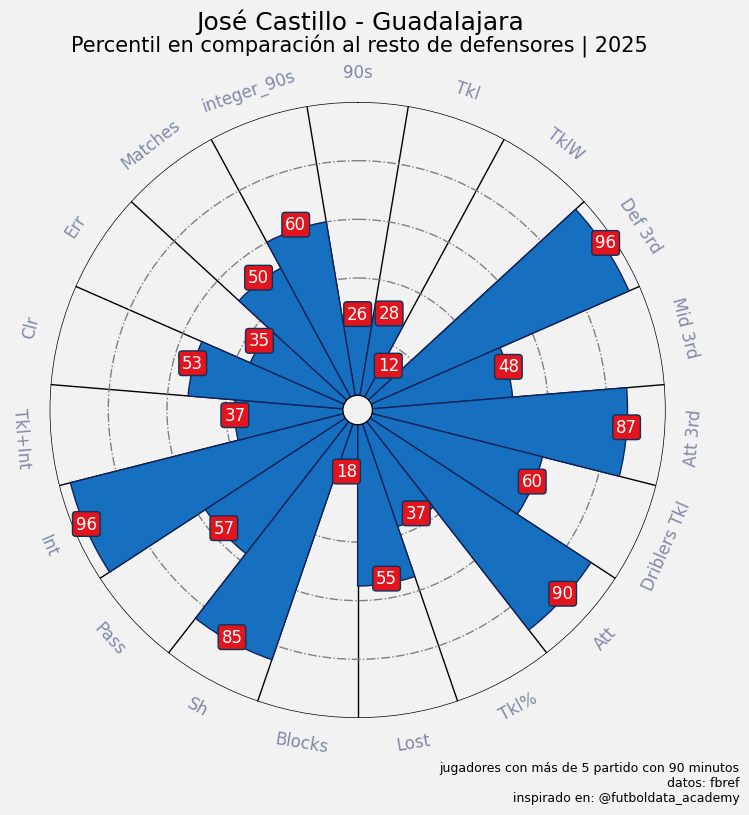

In [37]:
fig, ax = baker.make_pizza(
        values,
        figsize=(8, 8),          
        param_location=110,      
        kwargs_slices=dict(        
            facecolor="#176fc0", edgecolor="#0e235c",        
            zorder=2, linewidth=1
        ),                       
        kwargs_params=dict(        
            color="#0e235c", fontsize=12,        
            va="center", alpha=.5    
            ),                      
        kwargs_values=dict(        
            color="#ffffff", fontsize=12,        
            zorder=3,        
            bbox=dict(            
                edgecolor="#0a335c", facecolor="#e2141d",            
                boxstyle="round,pad=0.2", lw=1        
                )    
            )                    
        ) 
fig.text(    
    0.515, 0.97, "José Castillo - Guadalajara", size=18,    
    ha="center", color="#000000" 
    ) 
fig.text(    
    0.515, 0.942,    
    "Percentil en comparación al resto de defensores | 2025",    
    size=15,    
    ha="center", 
    color="#000000" ) 

notes = 'jugadores con más de 5 partido con 90 minutos' 
CREDIT_1 = "datos: fbref" 
CREDIT_2 = "inspirado en: @futboldata_academy"

fig.text(    
    0.99, 0.005, f"{notes}\n{CREDIT_1}\n{CREDIT_2}", size=9,    
    color="#000000",    
    ha="right" 
    ) 
plt.savefig('pizza.png',dpi=500,bbox_inches = 'tight')